In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width[cm]", "label"])

In [3]:
# data preprocessing and splitting

df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})


from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","sepal width[cm]", "petal length[cm]", "petal width[cm]"]

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)


X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

In [4]:
# distance function

def euclidean_distance(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

def manhattan_distance(x1, x2):
    return abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])

In [5]:
# gets k nearest neighbors to x_test

def get_neighbors(X_train, y_train, x_test, k, dist_func = manhattan_distance):
    neighbors = []
    for i in range(0, np.shape(X_train)[0]):
        neighbors.append([y_train[i], dist_func(X_train[i], x_test)])
    
    neighbors.sort(key = lambda x: x[1])
    return neighbors[0:k] # elements are [label of point, distance to point]

In [6]:
# base algorithm: kNN

def KNNclassifier(neighbors, k):
    if k == 1:
        return neighbors[0][0]
    else:
        counts = {0:0,
                  1:0,
                  2:0}
        for neighbor in neighbors:
            counts[neighbor[0]] += 1   
            
        return max(counts, key = counts.get)
        
def KNNclassify(x_test, k):
    return KNNclassifier(get_neighbors(X_train, y_train, x_test, k), k)

In [7]:
# extension: weighted kNN

def weight_distances(neighbors):
    weighted_neighbors = neighbors
    total = 0.0
    
    for i in range(0, len(neighbors)):
        inv = 1 / (neighbors[i][1]**2 + 1e-10) # add small offset to avoid division by NaN
        total += inv
        weighted_neighbors[i][1] = inv
        
    for i in range(0, len(neighbors)):
        weighted_neighbors[i][1] /= total
        
    return weighted_neighbors

def weighted_KNNclassifier(neighbors, k):
    weighted_neighbors = weight_distances(neighbors)
    if k == 1:
        return weighted_neighbors[0][0]
    else:
        counts = {0:0.0,
                  1:0.0,
                  2:0.0}
        for neighbor in weighted_neighbors:
            counts[neighbor[0]] += neighbor[1]
            
        return max(counts, key=counts.get)
    
    
def weighted_KNNclassify(x_test, k):
    return weighted_KNNclassifier(get_neighbors(X_train, y_train, x_test, k), k)

In [12]:
# testing extended algorithm

accs = []
for j in range(1, 20):
    correctly_classified = 0
    for i in range(0, X_test.shape[0]):
        result = weighted_KNNclassify(X_test[i], j)
        if result == y_test[i]:
            correctly_classified += 1
    accs.append([j, correctly_classified / y_test.shape[0]])
    
best = np.max(accs, axis=0)
print("best accuracy: %f using %d neighbors" %(best[1], best[0]))

best accuracy: 0.710526 using 19 neighbors


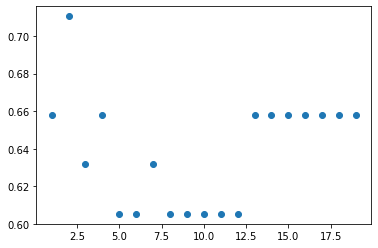

In [9]:
plt.scatter(*zip(*accs))

In [10]:
# testing scikit's algorithm

from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='distance')
clf.fit(X_train, y_train)


correctly_classified = 0
result = clf.predict(X_test)

for i in range(0, X_test.shape[0]):
    
    if result[i] == y_test[i]:
        correctly_classified += 1

print("For scikit's k = 3 nearest weighted neighbors:")
print("Accuracy: ", correctly_classified / y_test.shape[0])

For scikit's k = 3 nearest weighted neighbors:
Accuracy:  0.9736842105263158
